# Proyecto Parte 1
Andrea Cecilia Rivas Castañeda - 16001120

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import joblib

In [2]:
pd.pandas.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


# Análisis Exploratorio de las Variables
* El dataset está compuesto de 26 columnas, de las cuales 14 son numéricas y 12 son categóricas. 
    * 3 de las variables numéricas aparecen como tipo *Object*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

* Se elimino la columna *id* ya que esta no agrega valor al análisis.

In [5]:
data.drop('id', axis=1, inplace=True)

* Separación de variables categóricas y numéricas.

In [165]:
target = ['classification']
special_vars = ['rc', 'pcv', 'wc']
cat_vars = [var for var in data.columns if data[var].dtype == 'O' and (var not in (special_vars+target))]
num_vars = [var for var in data.columns if var not in (cat_vars+special_vars+target)]

In [166]:
cat_vars, num_vars

(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'],
 ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'])

## Variables Numéricas

In [8]:
num_vars

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

### Variables con Na's
* Descubrimos que todas las variables numéricas contienen valores nulos.

In [9]:
num_vars_with_NA = [var for var in num_vars if data[var].isnull().sum() > 0]
num_vars_with_NA

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [10]:
mean_num_vars_with_NA = data[num_vars_with_NA].isnull().mean().sort_values(ascending=False)
mean_num_vars_with_NA

pot     0.2200
sod     0.2175
hemo    0.1300
su      0.1225
sg      0.1175
al      0.1150
bgr     0.1100
bu      0.0475
sc      0.0425
bp      0.0300
age     0.0225
dtype: float64

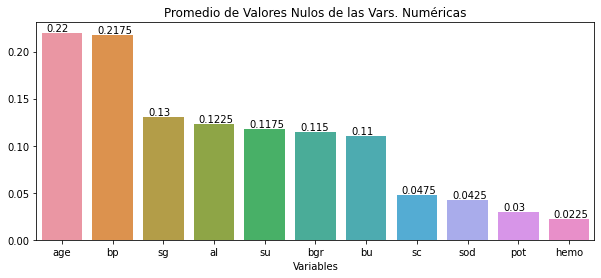

In [11]:
sns.set_palette("Set2")
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(x=num_vars_with_NA, y=mean_num_vars_with_NA)
for index, value in enumerate(mean_num_vars_with_NA):
    plt.text(index-.3,value+0.002, str(value))
plt.xlabel('Variables')
plt.title('Promedio de Valores Nulos de las Vars. Numéricas')
plt.show()

* Se realizó la separación entre variables discretas y continuas.

In [12]:
discrete_vars = [var for var in num_vars if((len(data[var].unique()) < 20))]
discrete_vars

['bp', 'sg', 'al', 'su']

In [13]:
cont_vars = [var for var in num_vars if var not in discrete_vars]
cont_vars

['age', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

## Variables Discretas
* Logramos observar que todas las variables discretas tienen un orden nominal.

In [14]:
for var in discrete_vars:
    print(var, ':', data[var].unique())

bp : [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
sg : [1.02  1.01  1.005 1.015   nan 1.025]
al : [ 1.  4.  2.  3.  0. nan  5.]
su : [ 0.  3.  4.  1. nan  2.  5.]


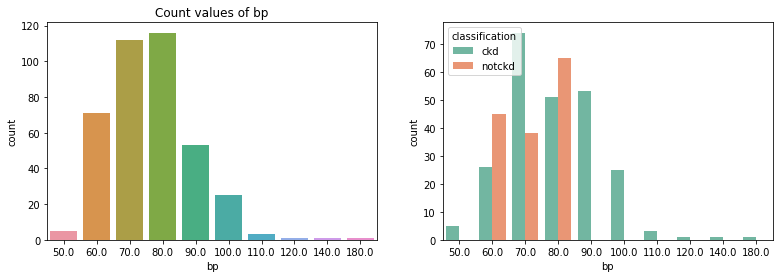

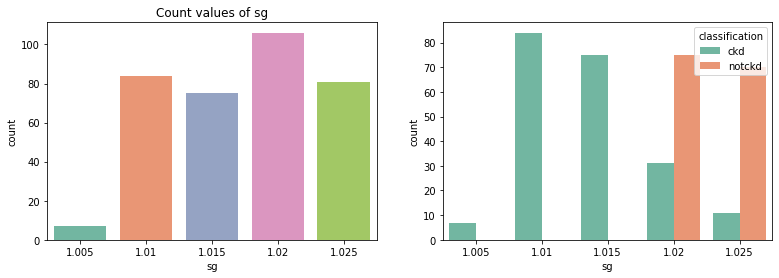

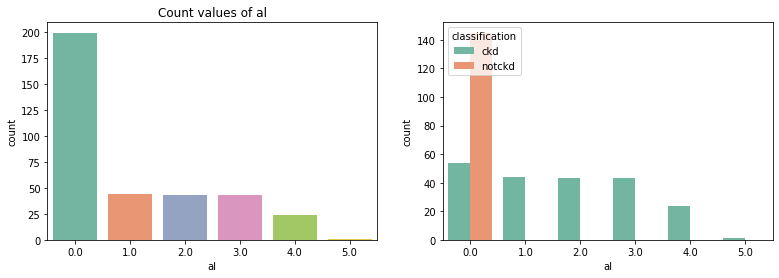

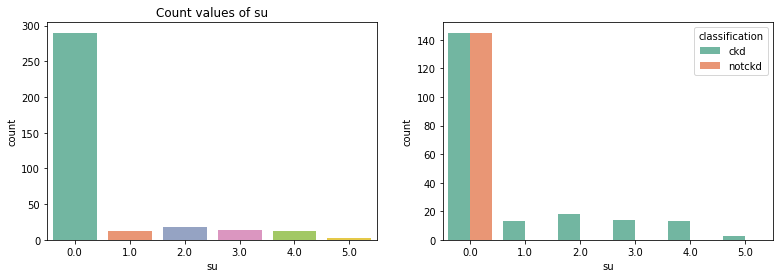

In [15]:
for var in discrete_vars:
    sns.set_palette("Set2")
    fig = plt.figure(figsize=(13,4))
    ax = fig.add_subplot(121)
    sns.countplot(x=var, data=data)
    plt.title('Count values of ' + var)
    ax2 = fig.add_subplot(122)
    sns.countplot(x=var, hue="classification", data=data)
    plt.show()

## Variables Continuas

In [16]:
data[cont_vars].describe()

,age,bgr,bu,sc,sod,pot,hemo
count,391.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


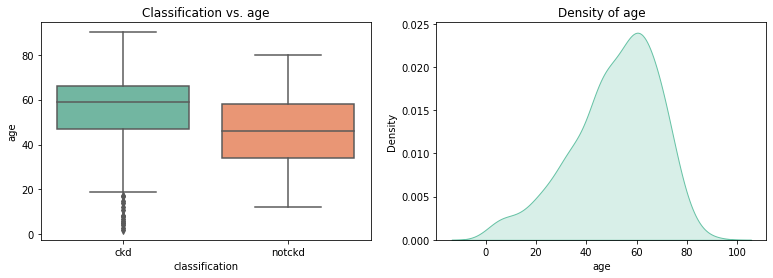

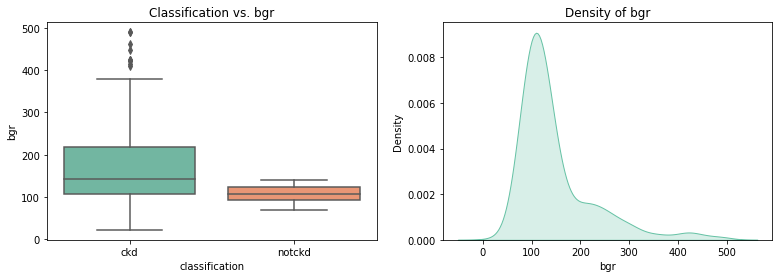

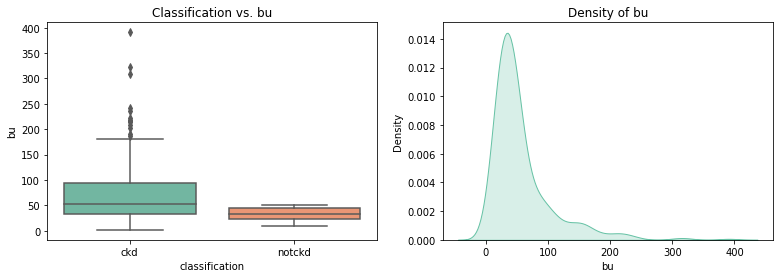

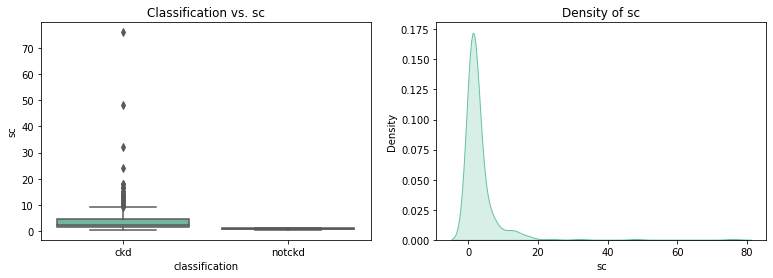

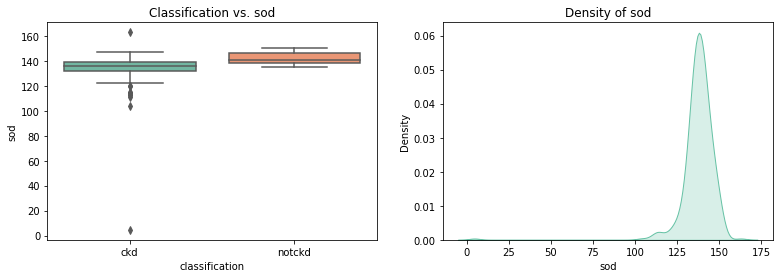

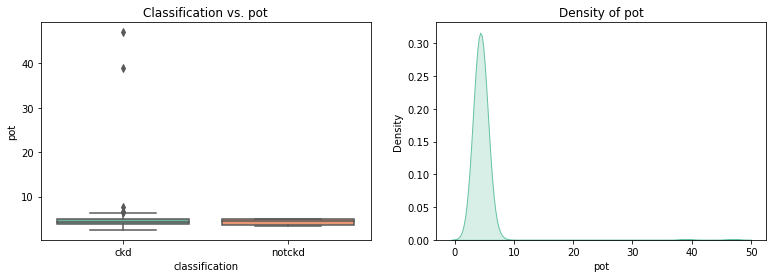

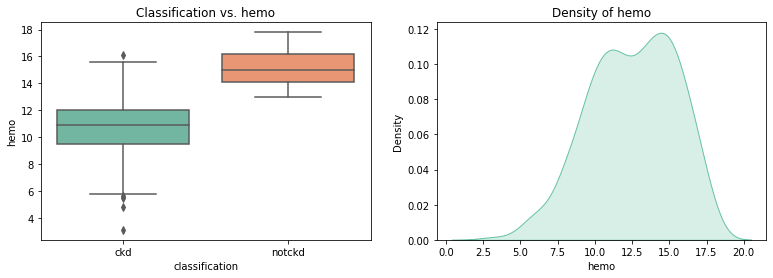

In [17]:
for idx, var in enumerate(cont_vars):
    fig = plt.figure(figsize=(13,4))
    ax = fig.add_subplot(121)
    sns.boxplot(x="classification", y=var, data=data)
    plt.title('Classification vs. '+ var)
    ax2 = fig.add_subplot(122)
    sns.kdeplot(data[var], shade=True)
    plt.title('Density of '+ var)
    plt.show()

## Variables Categóricas

In [31]:
data[cat_vars].nunique().sort_values(ascending=False)

dm                5
cad               3
rbc               2
pc                2
pcc               2
ba                2
htn               2
appet             2
pe                2
ane               2
classification    2
dtype: int64

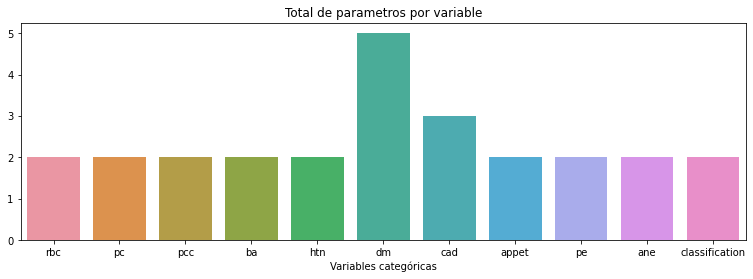

In [39]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)
sns.barplot(x=cat_vars, y=data[cat_vars].nunique())
plt.title('Total de parametros por variable')
plt.xlabel('Variables categóricas')
plt.show()

* Total de valores por parametro de cada variable.

In [18]:
for var in cat_vars:
    print(var + ':')
    print(data[var].value_counts())
    print()

rbc:
normal      201
abnormal     47
Name: rbc, dtype: int64

pc:
normal      259
abnormal     76
Name: pc, dtype: int64

pcc:
notpresent    354
present        42
Name: pcc, dtype: int64

ba:
notpresent    374
present        22
Name: ba, dtype: int64

htn:
no     251
yes    147
Name: htn, dtype: int64

dm:
no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

cad:
no      362
yes      34
\tno      2
Name: cad, dtype: int64

appet:
good    317
poor     82
Name: appet, dtype: int64

pe:
no     323
yes     76
Name: pe, dtype: int64

ane:
no     339
yes     60
Name: ane, dtype: int64

classification:
ckd       250
notckd    150
Name: classification, dtype: int64



### Variables con Na's

In [167]:
mean_cat_vars_with_NA = data[cat_vars].isnull().mean().sort_values(ascending=False)
mean_cat_vars_with_NA

rbc      0.3800
pc       0.1625
pcc      0.0100
ba       0.0100
htn      0.0050
dm       0.0050
cad      0.0050
appet    0.0025
pe       0.0025
ane      0.0025
dtype: float64

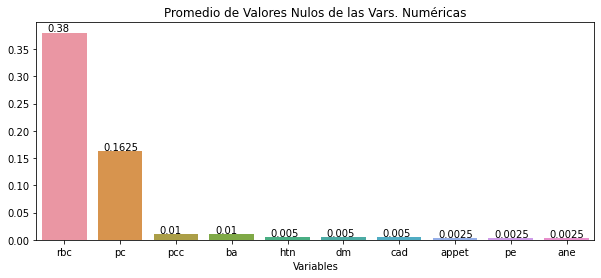

In [168]:
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(x=cat_vars, y=mean_cat_vars_with_NA)
for index, value in enumerate(mean_cat_vars_with_NA):
    plt.text(index-.3,value+0.002, str(value))
plt.xlabel('Variables')
plt.title('Promedio de Valores Nulos de las Vars. Numéricas')
plt.show()

# Tratamiento de Variables con NA's

## Variables Numéricas
### Variables Discretas

In [20]:
data.groupby('classification').count().rsub(data.groupby('classification').size(), axis=0)[discrete_vars]

,bp,sg,al,su
classification,,,,
ckd,10,42,41,44
notckd,2,5,5,5


In [21]:
data[['classification', 'bp']].groupby(['bp', 'classification']).size()

bp     classification
50.0   ckd                5
60.0   ckd               26
       notckd            45
70.0   ckd               74
       notckd            38
80.0   ckd               51
       notckd            65
90.0   ckd               53
100.0  ckd               25
110.0  ckd                3
120.0  ckd                1
140.0  ckd                1
180.0  ckd                1
dtype: int64

In [22]:
data[data.bp.isnull()][['bp','classification']]

,bp,classification
7,NaN,ckd
75,NaN,ckd
132,NaN,ckd
138,NaN,ckd
161,NaN,ckd
164,NaN,ckd
185,NaN,ckd
187,NaN,ckd
188,NaN,ckd
215,NaN,ckd


In [23]:
# Copia del dataset original
df_copy = data.copy()

# Imputación por media
df_copy['bp_mean'] = df_copy.bp.fillna(df_copy.bp.mean(), inplace = False)

# imputación por mediana
df_copy['bp_median'] = df_copy.bp.fillna(df_copy.bp.median(), inplace = False)

# imputación por valores random
df_copy

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification,bp_mean,bp_median
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd,80.0,80.0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd,50.0,50.0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd,80.0,80.0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd,70.0,70.0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd,80.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd,80.0,80.0
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd,70.0,70.0
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd,80.0,80.0
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd,60.0,60.0


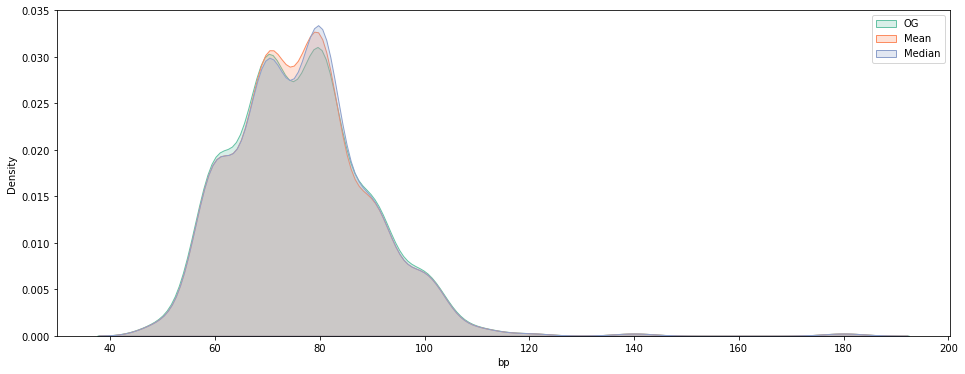

In [24]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
sns.set_palette('Set2')
sns.kdeplot(df_copy.bp, shade=True, label='OG')
sns.kdeplot(df_copy.bp_mean, shade=True, label='Mean')
sns.kdeplot(df_copy.bp_median, shade=True, label='Median')
plt.legend()
plt.show()